In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [33]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [34]:
# Filling in null values
filter_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
               'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
               'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

states = df['STATE'].unique()

for state in states:
    df.loc[df['STATE'] == state, filter_list] = df.loc[df['STATE'] == state, filter_list].interpolate()

# Dropping null values
df.dropna(inplace=True)

In [35]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


Question 1
Derive the descriptive statistics of the data and discuss the points you find remarkable.<br>
- TOTAL_EXPENDITURE is higher then TOTAL_REVENUE, schools are spending more then the have with most of it going to INSTRUCTION_EXPENDITURE.<br>
- Average Math scores are higher then the Average Reading for both grades 4 and 8.
- The standard deviation of math is higher then reading for both of the grades 4 and 8.
- In both the reading and math the max for grade 4 is close to the min of grade 8.

Question 2
Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

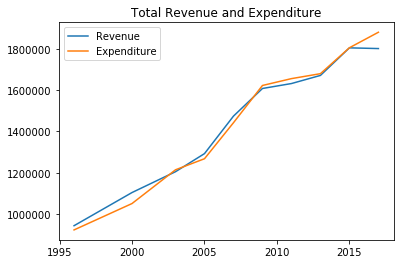

In [40]:
plt.plot(df.loc[df.STATE == 'MONTANA', 'YEAR'],
         df.loc[df.STATE == 'MONTANA', 'TOTAL_REVENUE'], label='Revenue')

plt.plot(df.loc[df.STATE == 'MONTANA', 'YEAR'],
         df.loc[df.STATE == 'MONTANA', 'TOTAL_EXPENDITURE'], label='Expenditure')

plt.title('Total Revenue and Expenditure')
plt.legend()
plt.show()

Question 3<br>
In your chosen state, which of the lessons are the students more successful, math or reading?

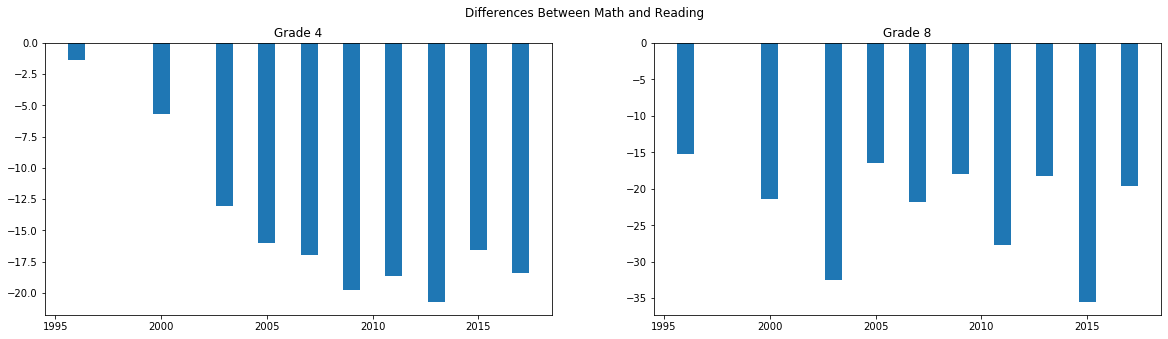

In [57]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(df.loc[df.STATE == 'MONTANA', 'YEAR'],
         df.loc[df.STATE == 'MONTANA', 'AVG_READING_4_SCORE'] - df.loc[df.STATE == 'MONTANA', 'AVG_MATH_4_SCORE'])
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == 'MONTANA', 'YEAR'],
         df.loc[df.STATE == 'MONTANA', 'AVG_READING_8_SCORE'] - df.loc[df.STATE == 'MONTANA', 'AVG_MATH_8_SCORE'])
plt.title('Grade 8')

plt.suptitle('Differences Between Math and Reading')
plt.show()

It looks like that the scores in Math are better then the scores in Reading a cross both grades.

Question 4<br>
What are the distributions of the math and reading scores in the sample?

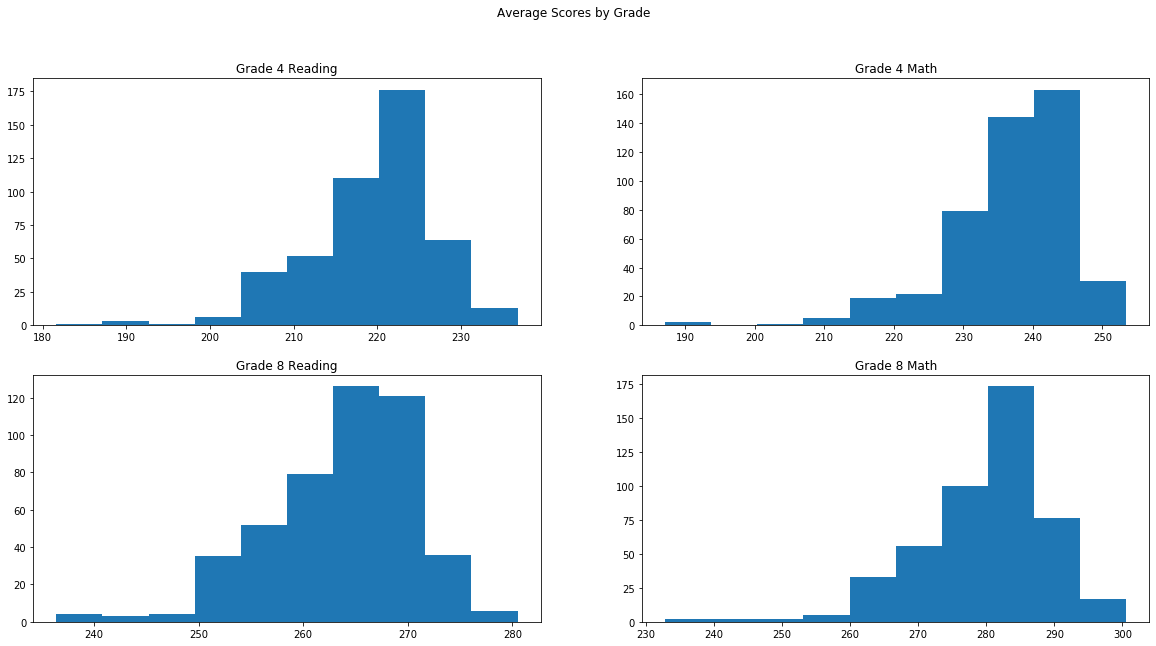

In [68]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE)
plt.title('Grade 4 Reading')

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_4_SCORE)
plt.title('Grade 4 Math')

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_8_SCORE)
plt.title('Grade 8 Reading')

plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE)
plt.title('Grade 8 Math')

plt.suptitle('Average Scores by Grade')
plt.show()

Question 5<br>
Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [69]:
#Reloading data since missing was cleared earlier
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

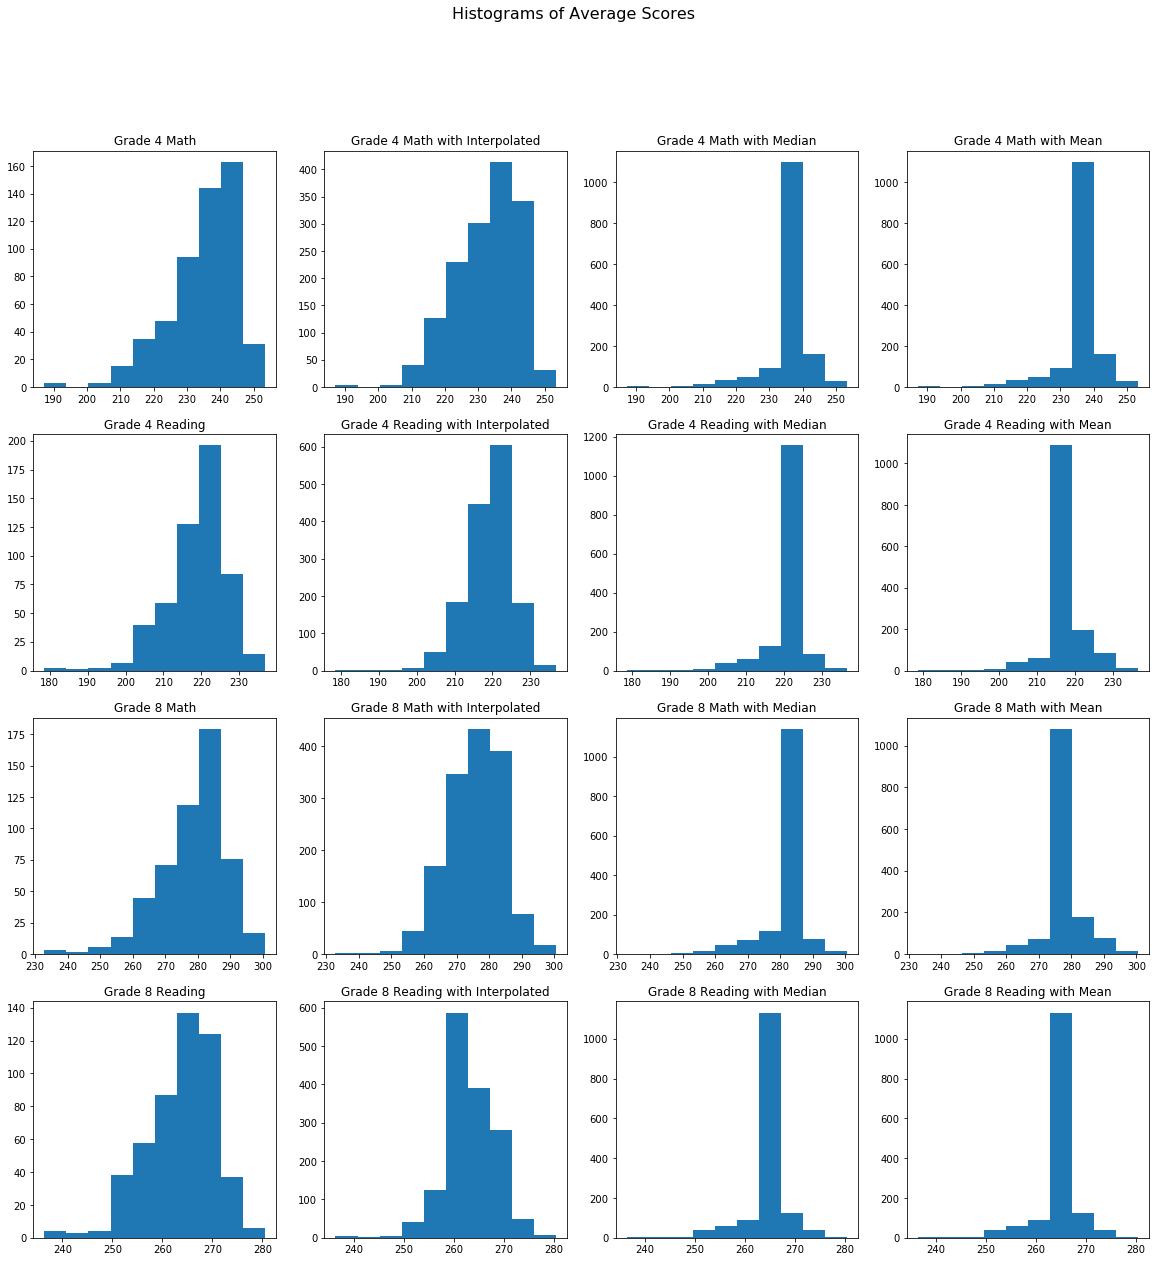

In [112]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title('Grade 4 Math')

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title('Grade 4 Math with Interpolated')

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title('Grade 4 Math with Median')

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title('Grade 4 Math with Mean')


plt.subplot(4,4,5)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title('Grade 4 Reading')

plt.subplot(4,4,6)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title('Grade 4 Reading with Interpolated')

plt.subplot(4,4,7)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title('Grade 4 Reading with Median')

plt.subplot(4,4,8)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title('Grade 4 Reading with Mean')


plt.subplot(4,4,9)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title('Grade 8 Math')

plt.subplot(4,4,10)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title('Grade 8 Math with Interpolated')

plt.subplot(4,4,11)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title('Grade 8 Math with Median')

plt.subplot(4,4,12)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title('Grade 8 Math with Mean')


plt.subplot(4,4,13)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title('Grade 8 Reading')

plt.subplot(4,4,14)
plt.hist(df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title('Grade 8 Reading with Interpolated')

plt.subplot(4,4,15)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title('Grade 8 Reading with Median')

plt.subplot(4,4,16)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title('Grade 8 Reading with Mean')

plt.suptitle('Histograms of Average Scores', size=16)
plt.show()

It has a massive effect when filling the data with Mean and Median, this is probably due to the amount of missing data in the dataset.